<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

Tutorial Video: https://www.youtube.com/watch?v=EItlUEPCIzM
<Br>Alternative: https://www.youtube.com/watch?v=461Opp1TShk

In [2]:
# Import require variables
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [19]:
# Import your dataset from the income.csv file
df = pd.read_csv("C:\\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


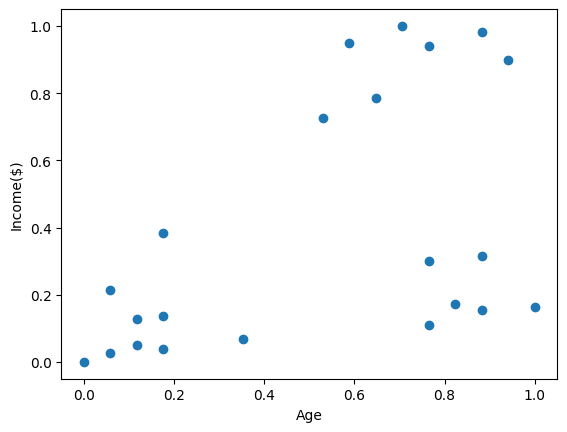

In [35]:
# Create a chart to show the data distrobution

# Create scatter plot chart with age on the x axis and income on the y axis
plt.scatter(df.Age,df['Income($)'])

# Setup chart labels
plt.xlabel('Age')
plt.ylabel('Income($)')

# Save scatter plot chart to png file
plt.savefig('kmeans-chart-example.png')

# Display the chart
plt.show()

In [50]:
# Create a KMeans object and set the number of clusters to 3
km = KMeans(n_clusters=3)

# Execute the initial prediction of groupings by generating the three random centroids 
# By default, scikit-learn's KMeans algorithm uses the k-means++ initialization method 
# to select the initial centroids. This method initializes centroids in a way that makes 
# them more spread out and likely to be representative of the dataset. It helps to improve 
# the convergence speed and the quality of the final clustering solution. So, it's a semi-random assignment.
y_predicted = km.fit_predict(df[['Age','Income($)']])

# Show results
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [64]:
# Add a column to the existing data frame named cluster that contains the cluster assignment
df['cluster']=y_predicted

# Show the top 20 rows
df.head(20)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [77]:
# This returns the calulated x,y coordinates of the centroids
km.cluster_centers_

array([[0.68627451, 0.96296296],
       [0.12941176, 0.11367521],
       [0.86764706, 0.14957265],
       [0.58823529, 0.75641026],
       [0.91176471, 0.94017094],
       [0.82352941, 0.30769231],
       [0.17647059, 0.38461538],
       [0.02941176, 0.01282051],
       [0.35294118, 0.06837607]])

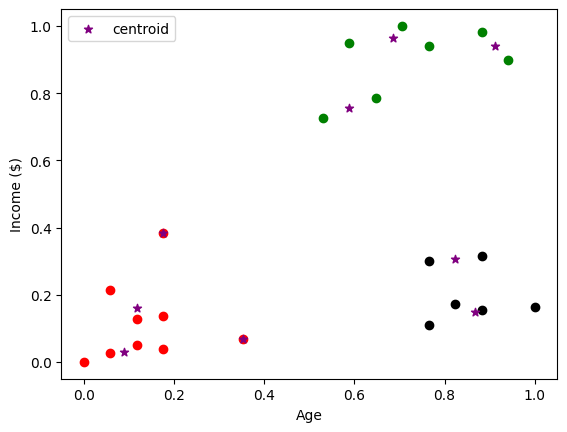

In [89]:
# Create new dataframes that contain rows for cluster 0,1,2
df0 = df[df.cluster==0] 
df1 = df[df.cluster==1] 
df2 = df[df.cluster==2] 

# Create scatter plot chart with age on the x axis and income on the y access
# This time we are adding the records for each group seperately so each can have its own color
plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')

# Here we are add a star so we can visualize where each centroid is
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

# Create chart labels
plt.xlabel('Age')
plt.ylabel('Income ($)')

# Create chart legend
plt.legend()

# Display chart
plt.show()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [100]:
# Now we are going to use the min/max scaler to optimize the dataset 

# Create a MinMaxScaler
# Note: min/max is only used on number features.
# It scales and translates each feature individually, such -
# that it is in the given range on the training set, e.g., between zero and one.
# This rescaling ensures that all features contribute equally to the distance 
# calculations during clustering. In some cases, min-max scaling may also improve convergence 
# by making the clusters more isotropic (uniform in all directions) and reducing the likelihood of elongated clusters.
# Example: 
# Xscale = X-Xmin / Xmax-Xmin
# NormalizedValue = Number - MinValue / MaxValue-MinValue
# Dataset: 200, 500, 852, 425, 135
# 0.090655509	= 200 - 135 / 852 - 135
# 0.509065551	= 500 - 135 / 852 - 135
# 1		        = 852 - 135 / 852 - 135
# 0.40446304	= 425 - 135 / 852 - 135
# 0		        = 135 - 135 / 852 - 135
scaler = MinMaxScaler()

# Fit the income data into the min/max scaler for normalization
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# Fit the age data into the min/max scaler for normalization
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [110]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


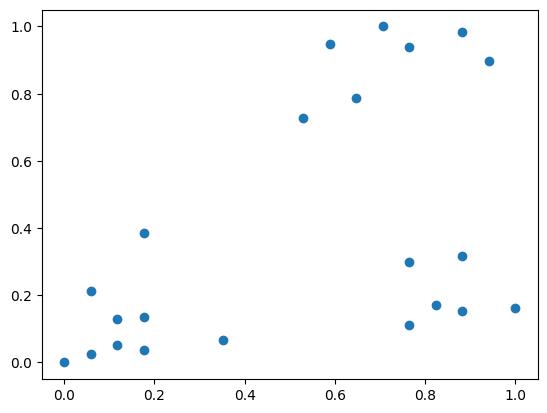

In [119]:
# Create updated scatter plot chart
plt.scatter(df.Age,df['Income($)'])

# Display chart
plt.show()

In [127]:
# This is the same function as last round, but the data normalization results in different groupings
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [134]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [140]:
# Show centroids again and observe the change
km.cluster_centers_

array([[0.11764706, 0.15954416],
       [0.58823529, 0.75641026],
       [0.86764706, 0.14957265],
       [0.91176471, 0.94017094],
       [0.08823529, 0.02884615],
       [0.68627451, 0.96296296],
       [0.17647059, 0.38461538],
       [0.35294118, 0.06837607],
       [0.82352941, 0.30769231]])

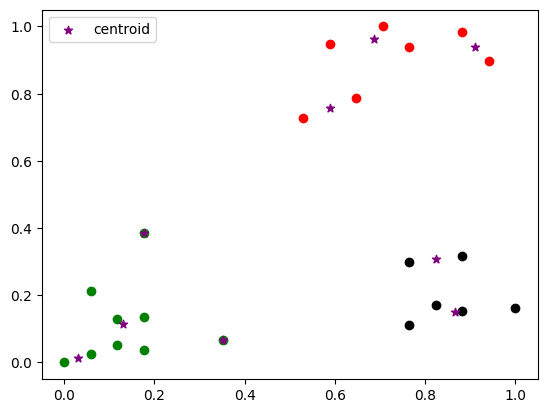

In [145]:
# Same as last round
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()

<h4 style='color:purple'>Elbow Plot</h4>

In [149]:
# Calculate the sum of squared error

# Create array to hold the list off error values
sse = []

# Generate 10 charts, increment number of clusters each round until you hit 10
k_rng = range(1,10)
for k in k_rng:

    # Set the number of clusters to match which number we are on
    km = KMeans(n_clusters=k)

    # Fit the data to model
    km.fit(df[['Age','Income($)']])

    # Save the sum of squared error for this iteration
    sse.append(km.inertia_) 

    # Display the error calculation for each iteration
    sse

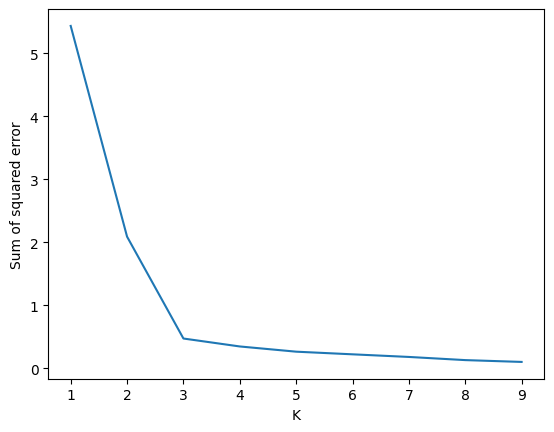

In [152]:
# Chart the errors
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

plt.show()

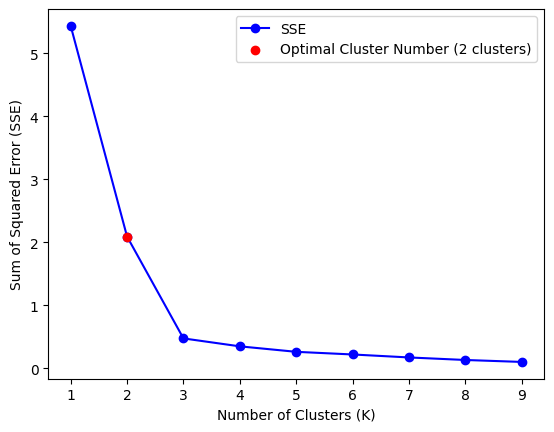

Optimal number of clusters (elbow point): 2


In [154]:
# Now let's try to programatically find the elbow of the loss curve to identify the optimal number of clusters

# Create array to hold the list of error values
sse = []

# Generate a range of cluster numbers to test
k_rng = range(1, 10)

# Fit KMeans models with different numbers of clusters
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)  # Save the sum of squared error for this iteration

# Plot the errors
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_rng, sse, marker='o', color='blue', label='SSE')

# Calculate the change in SSE for each cluster number
delta_sse = [sse[i] - sse[i-1] for i in range(1, len(sse))]

# Calculate the second derivative of SSE to identify the elbow point
second_derivative = [delta_sse[i] - delta_sse[i-1] for i in range(1, len(delta_sse))]

# Find the cluster number corresponding to the maximum change in the second derivative
optimal_num_clusters = second_derivative.index(max(second_derivative)) + 2  # Add 2 because index starts from 0 and we skipped 1 cluster

# Plot a dot at the optimal number of clusters (elbow point)
plt.scatter(optimal_num_clusters, sse[optimal_num_clusters - 1], color='red',zorder=5,label=f'Optimal Cluster Number ({optimal_num_clusters} clusters)')

# Add legend
plt.legend()

# Display the chart
plt.show()

# Print the optimal number of clusters (elbow point)
print("Optimal number of clusters (elbow point):", optimal_num_clusters)


<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k